In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import graphviz 

In [2]:
pip install graphviz 

In [3]:
df = pd.read_csv ( "Admission_Predict .csv" )
#to remove coulumn space
df.columns = df.columns.str.rstrip()

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
df.isna()
df = df.drop_duplicates()

In [6]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
df.loc[df['Chance of Admit'] >= 0.80, 'Chance of Admit'] = 1
df.loc[df['Chance of Admit'] < 0.80, 'Chance of Admit'] = 0

In [8]:
x = df.iloc [0:400 , 1:8]
y = df ['Chance of Admit']

In [9]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [10]:
y

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit, Length: 400, dtype: float64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [12]:
x_train.shape

(300, 7)

In [13]:
y_train.shape

(300,)

In [14]:
x_test.shape

(100, 7)

In [15]:
y_test.shape

(100,)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier (criterion = 'entropy')
model = model.fit(x_train , y_train)
model
#jab entropy = 0 that's my leaf node

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_predict = model.predict ( x_test )
y_predict

array([0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.])

In [19]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix (y_test , y_predict)
matrix

array([[59,  5],
       [ 5, 31]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_test,y_predict))


0.9


In [21]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        64
         1.0       0.86      0.86      0.86        36

    accuracy                           0.90       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



In [22]:
feature_name = df.columns[0:7]
print(feature_name , end = '')

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA'],
      dtype='object')

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

['0.0', '1.0']


[Text(0.45555555555555555, 0.9545454545454546, 'LOR <= 8.845\nentropy = 0.889\nsamples = 300\nvalue = [208, 92]\nclass = 0.0'),
 Text(0.08888888888888889, 0.8636363636363636, 'LOR <= 8.63\nentropy = 0.263\nsamples = 202\nvalue = [193, 9]\nclass = 0.0'),
 Text(0.044444444444444446, 0.7727272727272727, 'entropy = 0.0\nsamples = 151\nvalue = [151, 0]\nclass = 0.0'),
 Text(0.13333333333333333, 0.7727272727272727, 'CGPA <= 0.5\nentropy = 0.672\nsamples = 51\nvalue = [42, 9]\nclass = 0.0'),
 Text(0.08888888888888889, 0.6818181818181818, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = 0.0'),
 Text(0.17777777777777778, 0.6818181818181818, 'GRE Score <= 105.5\nentropy = 0.906\nsamples = 28\nvalue = [19, 9]\nclass = 0.0'),
 Text(0.13333333333333333, 0.5909090909090909, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 0.0'),
 Text(0.2222222222222222, 0.5909090909090909, 'LOR <= 8.725\nentropy = 0.976\nsamples = 22\nvalue = [13, 9]\nclass = 0.0'),
 Text(0.13333333333333333, 0.5, 'SOP <=

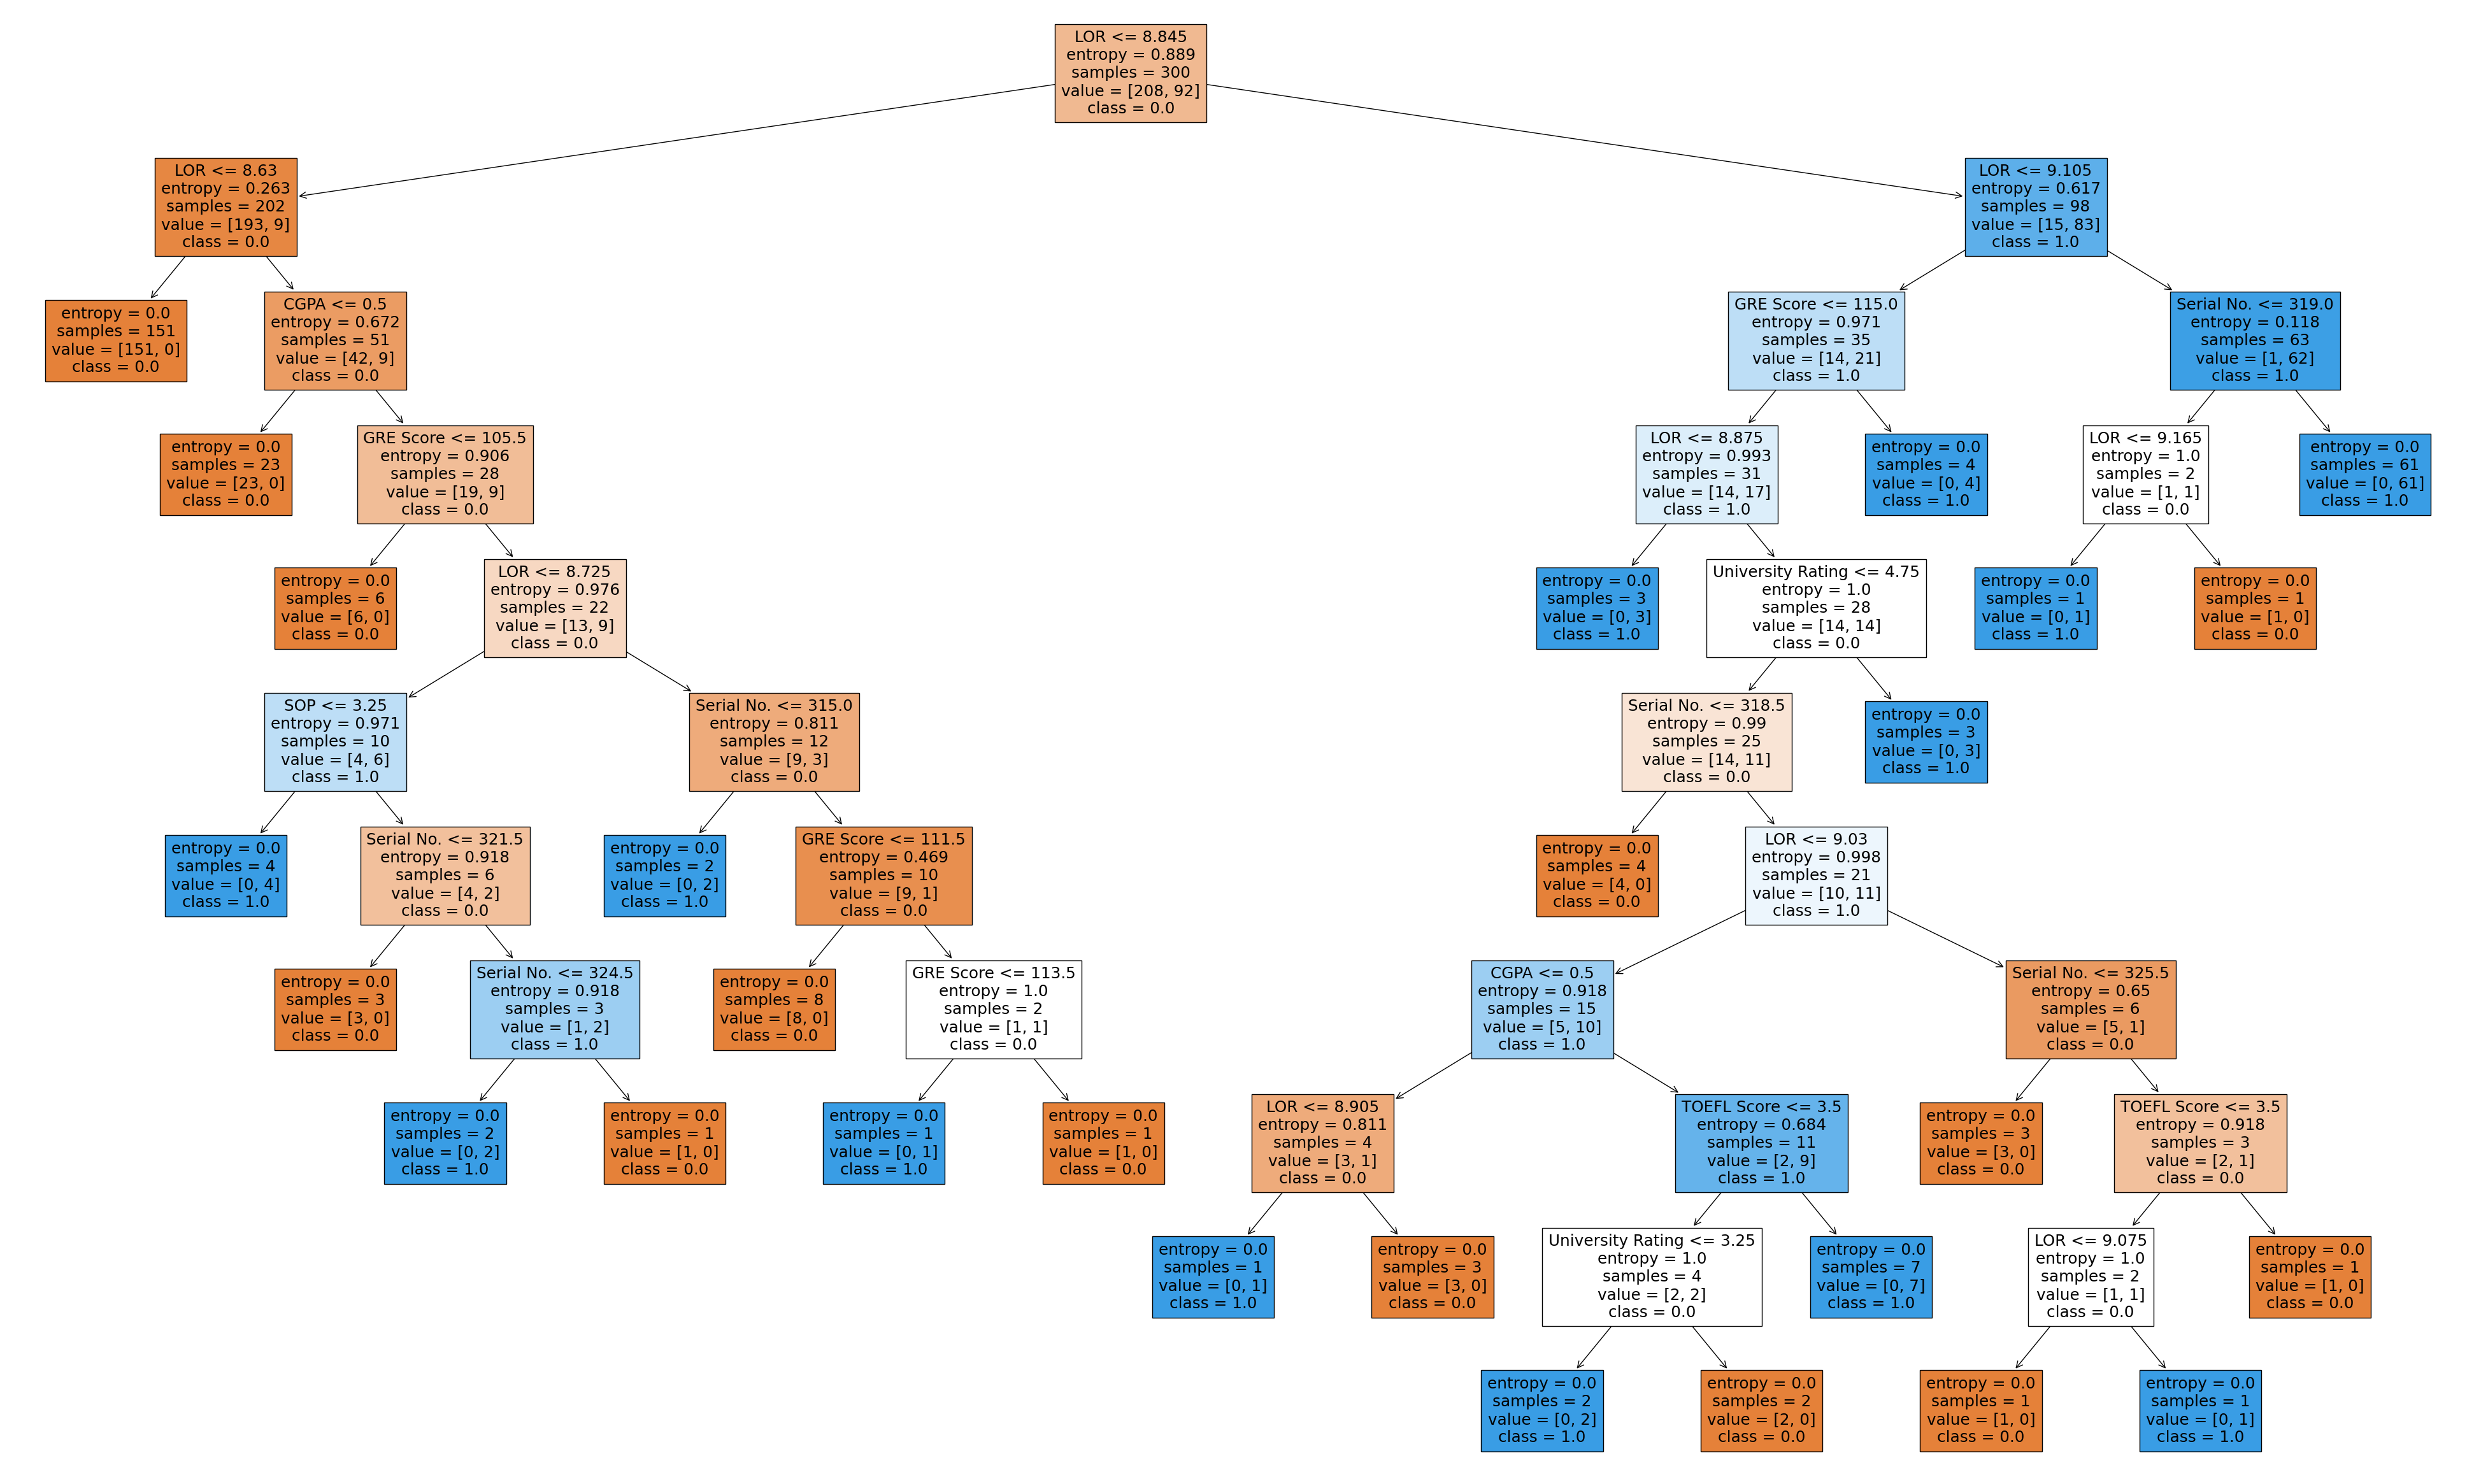

In [24]:
class_names = [str(x) for x in model.classes_]
print(class_names)
fig = plt.figure(figsize = (50,30) )
plot_tree (model , feature_names = feature_name , class_names = class_names, filled = True)

In [25]:
from sklearn import tree

In [26]:
dot_data = tree.export_graphviz ( model ,feature_names = feature_name , class_names = class_names, filled = True )

In [27]:
# graph = graphviz.Source(dot_data , format = "png")
# graph

In [28]:
from sklearn.model_selection import StratifiedKFold 
sf = StratifiedKFold(n_splits=5,shuffle=False, random_state=None)

In [29]:
depth = [1,2,3,4,5,6,7,8,9,10]

In [30]:
for d in depth:
    score = cross_val_score (tree.DecisionTreeClassifier(criterion = 'entropy' , max_depth = d , random_state = 0) , x_train , y_train , cv = sf , scoring = ('accuracy') )
    print("Average score of depth{} is : {} ".format(d,score.mean()))

NameError: name 'cross_val_score' is not defined